## Importing Packages

In [1]:
import xarray as xr
import pandas as pd
import numpy  as np
import scipy

import netCDF4
from netCDF4 import Dataset

import cartopy.crs as ccrs
import cartopy
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib

import sys
import subprocess

import seaborn as sns

import datetime

import glob
import os

import warnings
warnings.filterwarnings("ignore")

## Dataset

#### Map Information

In [ ]:
shp = 'd:/00_Masters/01_Dados/Shapes/brasil_UF.shp'

extent = [-39.1,-33, -14.3,-4.3] # lonmin lonmax latmin latmax
proj = ccrs.PlateCarree()

#### Glorys Dataset

In [2]:
# # Get a list of all .nc files available in different folders
filename = "D:/00_Masters/01_Dados/TW_depth.nc"
dsmerged = xr.open_dataset(filename)

# Climatology

### Monthly Climatology

In [ ]:
month_climatology = dsmerged['TW_depth'].groupby("time.month").mean()

Months = [1,2,3,4,5,6,7,8,9,10,11,12]

##### File - Max & Min

In [ ]:
Months_names = ['January','February','March',
                'April','May','June',
                'July','August','September',
                'October','November','December']


f = open("D:/00_Masters/03_Figuras_Finais/Climatologia/Ocean_temp/Outputs/Limite_Mensal_TW.txt", "w+")
for i,m in enumerate(Months):
    print('Processing: ' + Months_names[i])
    cc = month_climatology.sel(month=m)
    vmin = cc.min().values
    vmax = cc.max().values
    print('\n' + Months_names[i] + ':', file=f)
    print('Min.Temp =', vmin, file=f)
    print('Min.Temp =', vmax, file=f)
    print('Done: '+ Months_names[i])

f.close()  
print('\nFile Closed')


##### Figure - All maps in ONE

In [ ]:
Months_names = ['JAN','FEB','MAR',
                'APR','MAY','JUN',
                'JUL','AUG','SEP',
                'OCT','NOV','DEC']
                
## IMPORTANTE FIXAR VALORES PARA OS MINIMOS E MAXIMOS ##
Tmin = 33
Tmax = 193

Versao = 0

fig = plt.figure(figsize=(16.53,11.69), dpi = 300, tight_layout=True) # open a new figure window and set the resolution
fig.suptitle('Climatology\nTW/ACAS - σθ 25.7', fontsize=16, y=0.73)
fig.subplots_adjust(left=None, bottom=0.1, right=0.835, top=.7, wspace=0.1, hspace=0.005)
fig.patch.set_facecolor('white')

for n,m in enumerate(Months):
    if n>0:
        print('Done: '+ Months_names[n-1])

    print('Processing: ' + Months_names[n])

    cc = month_climatology.sel(month=m)
    del cc['month']

    ax = plt.subplot(2, 6, n+1, projection=proj)
    ax.set_extent(extent)
    ax.text(0.9, 0.02, Months_names[n], fontweight='bold', fontsize=12, transform=ax.transAxes, ha="right",)


    gl = ax.gridlines(crs=proj, draw_labels=True,
                        linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.xlocator = mticker.FixedLocator(np.arange(-34,-39.5,-2))
    gl.ylocator = mticker.FixedLocator(np.arange(-5,-14.5,-2.5)) 
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    plt.rcParams.update({'font.size': 10})

    if n != 0 and n != 6:
        gl.ylabels_left = False

    if n < 6:
        gl.xlabels_bottom = False


    shape_feature = ShapelyFeature(Reader(shp).geometries(),
                                    ccrs.PlateCarree(), edgecolor='gray',linewidth=.5)
    ax.add_feature(shape_feature,facecolor='oldlace')

    im = cc.plot(ax=ax, transform=proj, vmin=Tmin, vmax=Tmax,
                    cmap='rainbow', add_colorbar=False,facecolor='grey')

cbar_ax = fig.add_axes([0.85, 0.125, 0.01, 0.55])
cbar = fig.colorbar(im, cax=cbar_ax, orientation="vertical",) #shrink=.8
cbar.set_label(label='TW Max. Depth (m)', size=12)
cbar.ax.tick_params(labelsize=12)

print('Done: '+ Months_names[n])

plt.savefig('D:/00_Masters/03_Figuras_Finais/Climatologia/Ocean_temp/Figuras/TWacas-Clim_Mensal_v'+ str(Versao) + '.png',
            bbox_inches='tight') # Save image as PNG file without large white borders

print('Picture: Saved')
plt.close()

### Seasonal Climatology

In [ ]:
# # Para sazonalidade definida em ['DJF','MAM','JJA','SON']
# Season_climatology_0 = temp_0.groupby("time.season").mean()
# Season_climatology_30 = temp_30.groupby("time.season").mean()

# S_Cs = [Season_climatology_0, Season_climatology_30]

# Season = ['DJF','MAM','JJA','SON']
# Season_names = ['SUMMER','AUTUMN','WINTER','SPRING']

In [ ]:
Season = [[1,2,3],[4,5,6],[7,8,9],[10,11,12]] 
Season_names = ['SUMMER','AUTUMN','WINTER','SPRING']

season_climatology = {}
for s,sn in zip(Season,Season_names):
    season_climatology[sn] = dsmerged['TW_depth'].sel(time = np.in1d(dsmerged['time.month'], s)).mean('time')

##### File - Max & Min

In [ ]:

f = open("D:/00_Masters/03_Figuras_Finais/Climatologia/Ocean_temp/Outputs/Limites_Sazonal_TW.txt", "w+")
for i,sn in enumerate(Season_names):
    print('Processing: ' + Season_names[i])
    cc = season_climatology[sn]
    vmin = cc.min().values
    vmax = cc.max().values
    print('\n' + Season_names[i] + ':', file=f)
    print('Min.Temp =', vmin, file=f)
    print('Min.Temp =', vmax, file=f)
    print('Done: '+ Season_names[i])

f.close()  
print('\nFile Closed')

##### Figure - All maps in ONE

In [ ]:
Tmin = 33
Tmax = 193
## IMPORTANTE FIXAR VALORES PARA OS MINIMOS E MAXIMOS ##

Versao = 0

fig = plt.figure(figsize=(3.4,6.4),dpi=300)
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.85, top=0.8, wspace=0.05, hspace=0.05)
fig.suptitle('Climatology\nTW/ACAS - σθ 25.7', fontsize=12, y=0.85)
fig.patch.set_facecolor('white')

for n,s in enumerate(Season):
    if n > 0:
        print('Done: '+ Season_names[n-1])

    print('Processing: ' + Season_names[n])

    cS = season_climatology[Season_names[n]]

    ax = plt.subplot(2, 2, n+1, projection=proj)
    ax.set_extent(extent)
    ax.text(0.9, 0.02, Season_names[n], fontweight='bold', fontsize=10, transform=ax.transAxes, ha="right",)

    gl = ax.gridlines(crs=proj, draw_labels=True,
                        linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.xlocator = mticker.FixedLocator(np.arange(-34,-39.5,-2))
    gl.ylocator = mticker.FixedLocator(np.arange(-5,-14.5,-2.5)) 
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    plt.rcParams.update({'font.size': 8})

    if n != 0 and n != 2:
        gl.ylabels_left = False

    if n < 2:
        gl.xlabels_bottom = False

    shape_feature = ShapelyFeature(Reader(shp).geometries(),
                                    ccrs.PlateCarree(), edgecolor='gray',linewidth=.5)
    ax.add_feature(shape_feature,facecolor='oldlace')

    im = cS.plot(ax=ax, transform=proj, vmin=Tmin, vmax=Tmax, cmap='rainbow', add_colorbar=False,facecolor='grey')

print('Done: '+ Season_names[n])   

cbar_ax = fig.add_axes([0.90, 0.115, 0.02, 0.67])
cbar = fig.colorbar(im, cax=cbar_ax, orientation="vertical")
cbar.set_label(label='TW Max. Depth (m)', size=8)
cbar.ax.tick_params(labelsize=8)

plt.savefig('D:/00_Masters/03_Figuras_Finais/Climatologia/Ocean_temp/Figuras/TWacas-Clim_Sazonal_v'+ str(Versao) + '.png',
            bbox_inches='tight')

print('Picture: Saved')

plt.close()

------------------

## Ocorrencia < 120

###### Exporting values for checking

In [ ]:
vv = month_climatology.to_dataframe() 
mask = vv['TW_depth'] < 120
idx = pd.IndexSlice
vv[mask].to_csv('D:/00_Masters/01_Dados/TW_Depths_INTEREST.csv',sep=',')

In [87]:
dd = dsmerged.map(lambda p: dsmerged.TW_depth < 120 ) # Return array with boolean % similiar to where

Occur = pd.DataFrame(np.zeros((dd.latitude.size,dd.longitude.size)))
nOccur = pd.DataFrame(np.zeros(dd.latitude.size))

for ti in np.arange(0,dd.time.size,1):
# loop through lat,lon indices
    for yi in np.arange(0,dd.latitude.size,1):        
        for xi in np.arange(0,dd.longitude.size,1):
            if dd.TW_depth[ti][yi][xi] == True:
                Occur[yi][xi] += 1 
            else:
                pass

 
for i in np.arange(0,len(Occur)):
    nOccur[i] = Occur[i].sum()

# Export data
Occur.to_csv('D:/00_Masters/01_Dados/matriz_Ocorrencia.csv')
nOccur.set_index(dd.latitude.values,inplace=True)
nOccur.to_csv('D:/00_Masters/01_Dados/count_lat.csv')


In [146]:
df_sum.iloc[:108]

,0
-14.333333,1889.0
-14.250000,2210.0
-14.166667,2804.0
-14.083333,3514.0
-14.000000,1026.0
...,...
-5.750000,3733.0
-5.666667,4288.0
-5.583333,4979.0
-5.500000,5802.0


<StemContainer object of 3 artists>

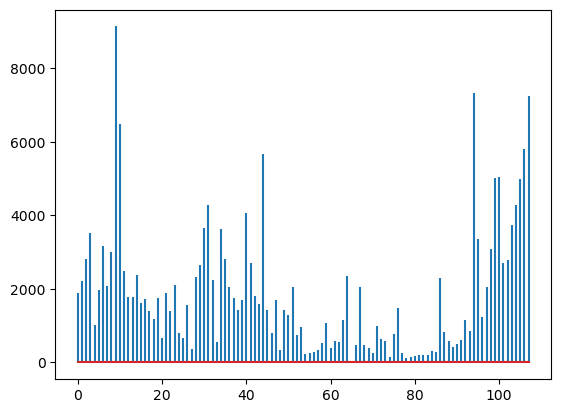

In [153]:
plt.stem(df_sum.iloc[:108],markerfmt=" ",)

In [45]:
dd.TW_depth[0][120][-1].values

array(True)

In [80]:
nOcurr = np.zeros(dd.latitude.size)

In [85]:
occur.size

8954

In [83]:
nOcurr = np.zeros(dd.latitude.size)
for i in np.arange(0,len(occur)):
    nOcurr[i] = occur[i].sum()

(array([60.,  3.,  3.,  1.,  4.,  4.,  2.,  5.,  1.,  2.,  0.,  0.,  1.,
         3.,  3.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55

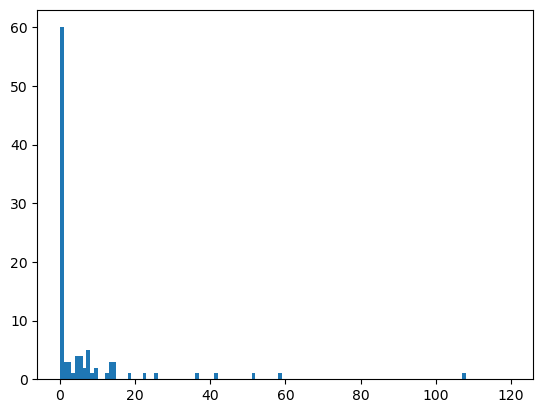

In [84]:
plt.hist(nOcurr,np.arange(0,len(occur)))#,weight=nOcurr)

In [72]:
bins

array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.])